# Lab_2_CV1
## by GIRLA Ionut 411-SIVA

### Importing the necessary libraries.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import ipyplot
import os
import cv2
from sklearn.metrics import confusion_matrix
import random
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from skimage.morphology import skeletonize
from skimage import data
import matplotlib.pyplot as plt
from skimage.util import invert
from skimage import morphology, filters
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

Setting the dataset directory and the categories:

In [2]:
DATADIR = "E:/SIVA-Master/AN_1/Sem_1/CV1/Laborator/Baza_de_imagini"
CATEGORIES = ["0","1","2","3"]
cat = [0,1,2,3]
IMG_SIZE = 300   #PARAMETRU UTILIZAT LA RESIZE
IMG_SIZE_FACTOR = 5   #PARAMETRU UTILIZAT LA RESIZE
scale = 0.5   #DEFAULT
delta = 0   #DEFAULT
ddepth = cv2.CV_16S #DEFAULT

Reading each image and placing it into an array:

40


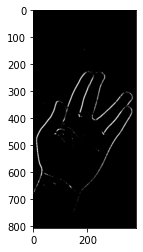

In [3]:
def import_dataset_with_addaptive_proportional_resize():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category) #CONVERT CATEGORY NAME TO A NUMBER
        #print(f"os.listdir(path) {os.listdir(path)}")
        for img in os.listdir(path):
            try: 
                kernel = np.ones((4,4),np.float32)/25
                img_array = cv2.imread(os.path.join(path,img))
                (b, g, r) = cv2.split(img_array)
                r = cv2.filter2D(r,-1,kernel)
                r = cv2.morphologyEx(r, cv2.MORPH_OPEN, kernel)
                r = cv2.morphologyEx(r, cv2.MORPH_CLOSE, kernel)
                r = cv2.GaussianBlur(r, (3, 3), 0)
                r = cv2.filter2D(r,-1,kernel)
                
                img_array = cv2.adaptiveThreshold(r,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,11,2)

                
                kernel = np.ones((5,5),np.float32)/25
                img_array = cv2.filter2D(img_array,-1,kernel)
                
                width = int(img_array.shape[1] / IMG_SIZE_FACTOR)
                height = int(img_array.shape[0]  / IMG_SIZE_FACTOR)
                dim = (width, height)
                img_array = cv2.resize(img_array, dim, interpolation = cv2.INTER_AREA)
                
                grad_x = cv2.Sobel(img_array, ddepth, 1, 0, ksize=3, scale=scale, delta=delta, borderType=cv2.BORDER_DEFAULT) 
                grad_y = cv2.Sobel(img_array, ddepth, 0, 1, ksize=3, scale=scale, delta=delta, borderType=cv2.BORDER_DEFAULT)
                abs_grad_x = cv2.convertScaleAbs(grad_x)
                abs_grad_y = cv2.convertScaleAbs(grad_y)
                grad = cv2.addWeighted(abs_grad_x,1, abs_grad_y,1, 0)
                dataset.append([grad, class_num])
            except Exception as e:
                pass
dataset = [] 
import_dataset_with_addaptive_proportional_resize()
print(len(dataset))

random.shuffle(dataset)
print(np.shape(dataset))
for img_array, eticheta in dataset:
        #print(img_array)
        #ipyplot.plot_images(img_array, max_images=27, img_width=100)
        plt.imshow(img_array, cmap = "gray")
        plt.show()

### Separating the data in the feature matrix and the vector of dependent values

In [4]:
X = []
y = []

for features, label in dataset:
    X.append(features)
    y.append(label)
    
#X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)  #to be uncommented if chosen to resize imgs

Splitting the dataset in 60% train 10% test 30% validare

In [5]:
train_ratio = 0.70
#validation_ratio = 0.30
test_ratio = 0.30

# train is now 75% of the entire data set
# the _junk suffix means that we drop that variable completely
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=1 - train_ratio)

# test is now 10% of the initial data set
# validation is now 15% of the initial data set
#x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=test_ratio/(test_ratio + validation_ratio)) 

#print(f" size of x_train: {len(x_train)}, size of x_val: {len(x_val)}, size of x_test: {len(x_test)}")
print(f" size of x_train: {len(x_train)}, size of x_test: {len(x_test)}")

 size of x_train: 27, size of x_test: 13


### Extracting the coordinates of white points

In [6]:
aux = []
reshaped_x_train_array = []
print(f" size of x_train: {np.shape(x_train)}")
for i in x_train:
        x,y = np.nonzero(i)
        t = np.array(list(zip(x, y))).flatten()
        print(len(t))
        aux.append(t[0:10000])
reshaped_x_train_array.append(aux)

print(f" size of reshaped_x_train_array: {np.shape(reshaped_x_train_array)}")

aux = []
reshaped_x_test_array = []
print(f" size of x_train: {np.shape(x_train)}")
for i in x_test:
        x,y = np.nonzero(i)
        t = np.array(list(zip(x, y))).flatten()
        aux.append(t[0:10000])
reshaped_x_test_array.append(aux)


 size of x_train: (27, 806, 381)
11702
21142
28354
25514
28986
22878
24714
25864
20852
16482
26870
27740
21970
19462
23146
32122
17802
23538
24592
23542
20562
16638
30902
13672
22536
23072
31952
 size of reshaped_x_train_array: (1, 27, 10000)
 size of x_train: (27, 806, 381)


### Prediction and i

In [7]:
cnt_train = 0
data_train = np.reshape(reshaped_x_train_array,(27,10000))
data_test = np.reshape(reshaped_x_test_array,(13,10000))
print(f" size of x_train: {np.shape(data_train)}")
print(f" size of x_test: {np.shape(data_test)}")

knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(data_train,y_train)

print("TRAIN DATA RESULTS")
y_train_predicted = knn.predict(data_train)

for i in range (27):
    if (y_train[i] == y_train_predicted[i]):
        print (f"y_test = {y_train[i]} && {y_train_predicted[i]} = y_predicted : TRUE")
        cnt_train += 1
    else:
        print (f"y_test = {y_train[i]} && {y_train_predicted[i]} = y_predicted : FALSE")
        
print(f"results for train data: {cnt_train}/27")

print("\n\nTEST DATA RESULTS for knn\n")
y_test_predicted = knn.predict(data_test)
cnt_test = 0
for i in range (13):
    if (y_test[i] == y_test_predicted[i]):
        cnt_test += 1
        print (f"y_test = {y_test[i]} && {y_test_predicted[i]} = y_predicted : TRUE")
    else:
        print (f"y_test = {y_test[i]} && {y_test_predicted[i]} = y_predicted : FALSE")
print(f"results for train data: {cnt_test} /13")

clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(data_train, y_train)
y_predicted_svm = clf.predict(data_test)

print("\n\nTEST DATA RESULTS for svm\n")
cnt_test = 0
for i in range (13):
    if (y_test[i] == y_predicted_svm[i]):
        cnt_test += 1
        print (f"y_test = {y_test[i]} && {y_predicted_svm[i]} = y_predicted : TRUE")
    else:
        print (f"y_test = {y_test[i]} && {y_predicted_svm[i]} = y_predicted : FALSE")
print(f"results for train data: {cnt_test} /13")



 size of x_train: (27, 10000)
 size of x_test: (13, 10000)
TRAIN DATA RESULTS
y_test = 2 && 2 = y_predicted : TRUE
y_test = 1 && 1 = y_predicted : TRUE
y_test = 0 && 0 = y_predicted : TRUE
y_test = 1 && 3 = y_predicted : FALSE
y_test = 0 && 1 = y_predicted : FALSE
y_test = 3 && 0 = y_predicted : FALSE
y_test = 3 && 1 = y_predicted : FALSE
y_test = 3 && 1 = y_predicted : FALSE
y_test = 0 && 0 = y_predicted : TRUE
y_test = 2 && 3 = y_predicted : FALSE
y_test = 3 && 1 = y_predicted : FALSE
y_test = 1 && 1 = y_predicted : TRUE
y_test = 3 && 3 = y_predicted : TRUE
y_test = 1 && 1 = y_predicted : TRUE
y_test = 0 && 1 = y_predicted : FALSE
y_test = 0 && 0 = y_predicted : TRUE
y_test = 3 && 1 = y_predicted : FALSE
y_test = 1 && 1 = y_predicted : TRUE
y_test = 1 && 1 = y_predicted : TRUE
y_test = 1 && 1 = y_predicted : TRUE
y_test = 0 && 0 = y_predicted : TRUE
y_test = 2 && 0 = y_predicted : FALSE
y_test = 3 && 0 = y_predicted : FALSE
y_test = 2 && 1 = y_predicted : FALSE
y_test = 3 && 1 = y_pr

### Confusion Matrix

[0, 2, 0, 2, 3, 2, 2, 1, 3, 1, 0, 2, 2]
[1 3 1 0 0 0 3 3 0 1 1 3 2]
[[0 3 0 0]
 [0 1 0 1]
 [2 0 1 3]
 [2 0 0 0]]


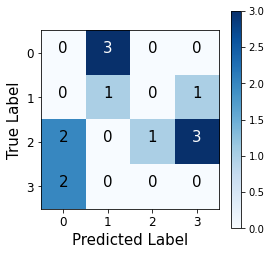

In [8]:
print(y_test)
print(y_test_predicted)
cm = confusion_matrix(y_true = y_test[:] ,y_pred = y_test_predicted, labels =  cat)
print(cm)
fig = plt.figure(figsize=(4,4))
plt.imshow(cm, cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(4)
plt.xticks(tick_marks, cat, fontsize=12)
plt.yticks(tick_marks, cat, fontsize=12)
plt.xlabel('Predicted Label', fontsize=15)
plt.ylabel('True Label', fontsize=15)
for i in range(len(cm)):
    for j in range(len(cm[i])):
        color = 'black'   
        if cm[i][j] > 2:
            color = 'white'
        plt.text(j, i, format(cm[i][j]), 
                horizontalalignment='center',
                color=color, fontsize=15)
plt.gcf().canvas.draw()

# Trecere la date preluate din componenta red + op_morfologice

In [12]:
def import_dataset_with_IMG_SIZE_resize():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category) #CONVERT CATEGORY NAME TO A NUMBER
        #print(f"os.listdir(path) {os.listdir(path)}")
        for img in os.listdir(path):
            try:    
                img_array = cv2.imread(os.path.join(path,img))
                #plt.imshow(img_array)
                #plt.show()
                kernel = np.ones((5,5),np.float32)/25
                dst = cv2.filter2D(img_array,-1,kernel)     
                (b, g, r) = cv2.split(img_array)
                r = cv2.filter2D(r,-1,kernel)
                ret_r, img_array = cv2.threshold(r, 90, 255, cv2.THRESH_BINARY)
                #plt.imshow(img_array)
                #plt.show()
                kernel = np.ones((6,6),np.float32)/25
                img_array = cv2.morphologyEx(img_array, cv2.MORPH_GRADIENT, kernel)
                #plt.imshow(img_array)
                #plt.show()
                img_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE)) #to be uncom if imgs are resized
                #We calculate the "derivatives" in x (1, 0) and y (0, 1) directions. For this, we use the function Sobel() as shown below
                grad_x = cv2.Sobel(img_array, ddepth, 1, 0, ksize=3, scale=scale, delta=delta, borderType=cv2.BORDER_DEFAULT) 
                grad_y = cv2.Sobel(img_array, ddepth, 0, 1, ksize=3, scale=scale, delta=delta, borderType=cv2.BORDER_DEFAULT)
                abs_grad_x = cv2.convertScaleAbs(grad_x)
                abs_grad_y = cv2.convertScaleAbs(grad_y)
                grad = cv2.addWeighted(abs_grad_x, 0.5, abs_grad_y, 0.5, 0)        
                
                dataset.append([grad, class_num])
                
            except Exception as e:
                pass
dataset = [] 
import_dataset_with_IMG_SIZE_resize()
print(len(dataset))


40


In [13]:
X = []
y = []

for features, label in dataset:
    X.append(features)
    y.append(label)
    
#X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)  #to be uncommented if chosen to resize imgs

In [14]:
train_ratio = 0.70
#validation_ratio = 0.30
test_ratio = 0.30

# train is now 75% of the entire data set
# the _junk suffix means that we drop that variable completely
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=1 - train_ratio)

# test is now 10% of the initial data set
# validation is now 15% of the initial data set
#x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=test_ratio/(test_ratio + validation_ratio)) 

#print(f" size of x_train: {len(x_train)}, size of x_val: {len(x_val)}, size of x_test: {len(x_test)}")
print(f" size of x_train: {len(x_train)}, size of x_test: {len(x_test)}")

 size of x_train: 27, size of x_test: 13


(40, 2)


E:\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


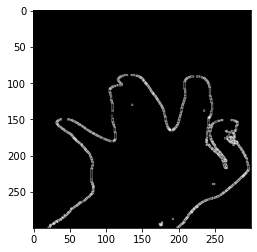

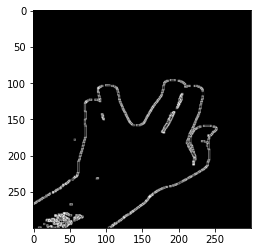

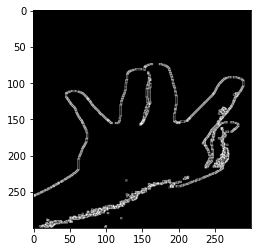

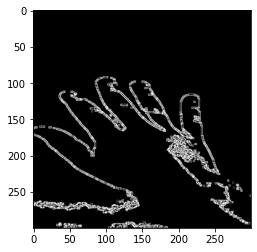

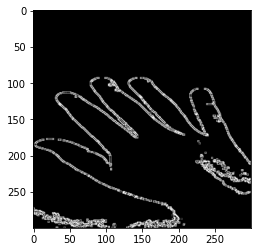

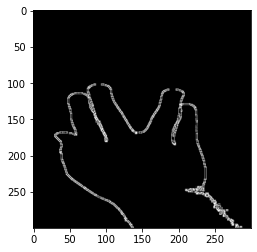

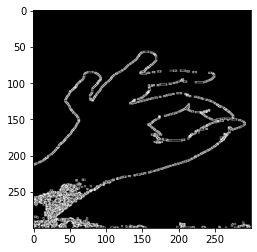

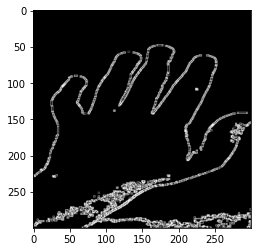

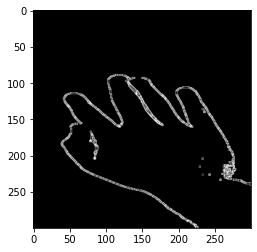

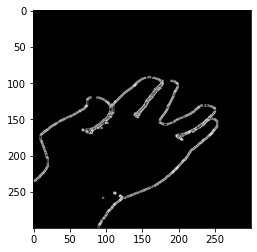

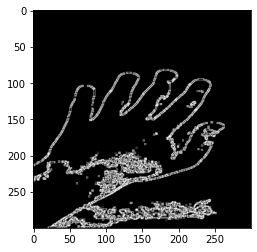

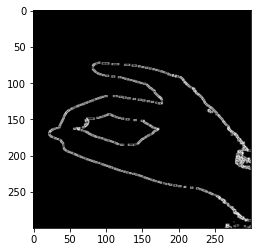

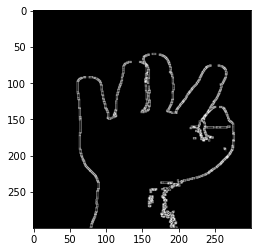

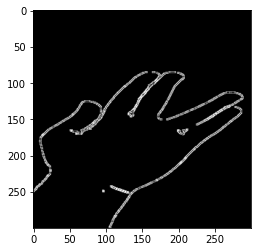

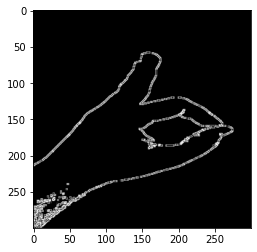

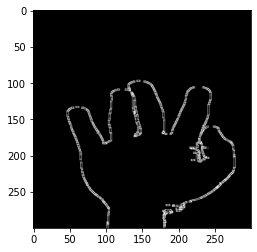

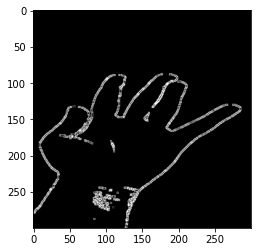

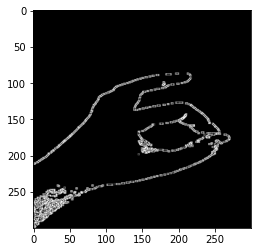

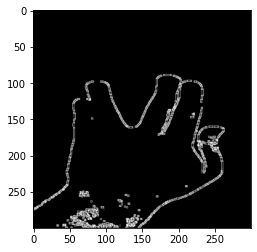

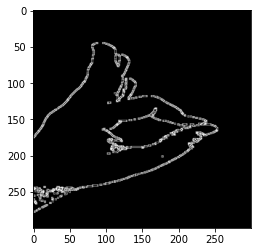

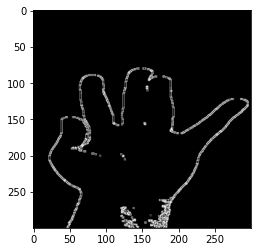

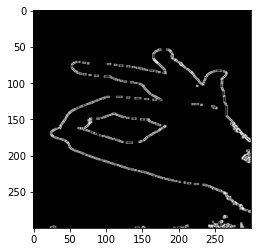

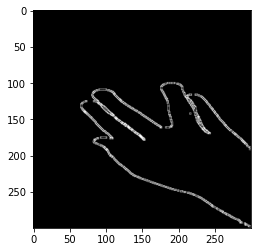

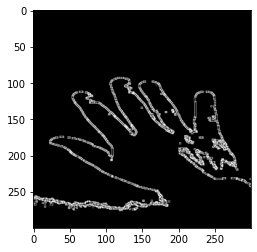

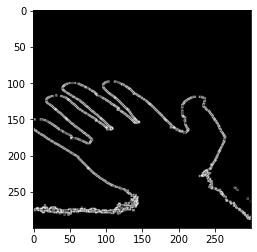

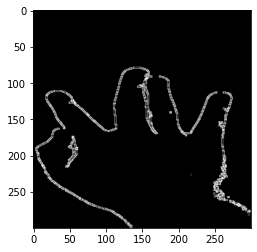

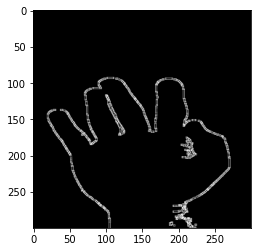

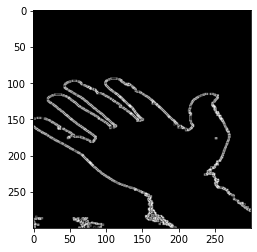

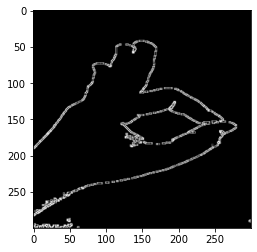

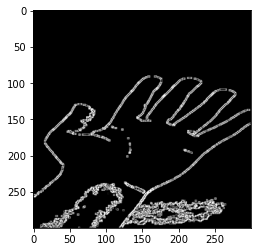

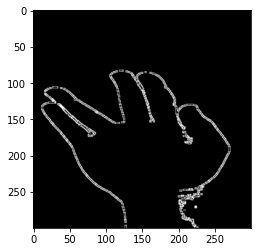

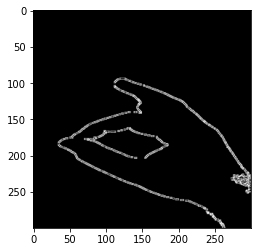

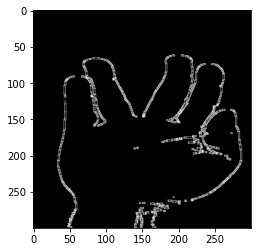

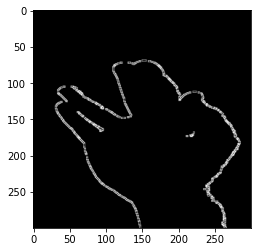

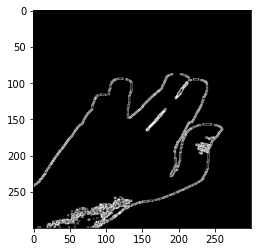

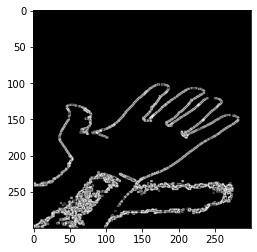

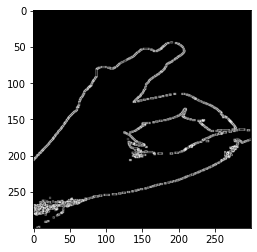

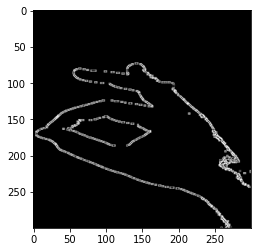

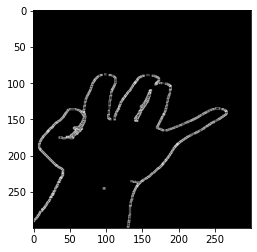

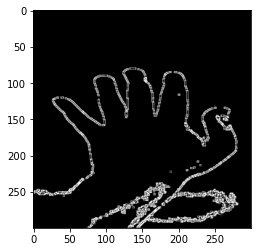

In [15]:
random.shuffle(dataset)
print(np.shape(dataset))
for img_array, eticheta in dataset:
        #print(img_array)
        #ipyplot.plot_images(img_array, max_images=27, img_width=100)
        plt.imshow(img_array, cmap = "gray")
        plt.show()


In [16]:
aux = []
reshaped_x_train_array = []
print(f" size of x_train: {np.shape(x_train)}")
for i in x_train:
        x,y = np.nonzero(i)
        t = np.array(list(zip(x, y))).flatten()
        print(len(t))
        aux.append(t[0:1000])
reshaped_x_train_array.append(aux)

print(f" size of reshaped_x_train_array: {np.shape(reshaped_x_train_array)}")

aux = []
reshaped_x_test_array = []
print(f" size of x_train: {np.shape(x_train)}")
for i in x_test:
        x,y = np.nonzero(i)
        t = np.array(list(zip(x, y))).flatten()
        aux.append(t[0:1000])
reshaped_x_test_array.append(aux)


 size of x_train: (27, 300, 300)
10570
7310
7554
8840
17780
11048
9278
8856
11218
18082
23460
7150
9324
8306
7960
8404
9162
8810
6894
9376
8842
16858
18582
14822
7986
9448
6626
 size of reshaped_x_train_array: (1, 27, 1000)
 size of x_train: (27, 300, 300)


In [17]:
cnt_train = 0
data_train = np.reshape(reshaped_x_train_array,(27,1000))
data_test = np.reshape(reshaped_x_test_array,(13,1000))
print(f" size of x_train: {np.shape(data_train)}")
print(f" size of x_test: {np.shape(data_test)}")

knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(data_train,y_train)

print("TRAIN DATA RESULTS")
y_train_predicted = knn.predict(data_train)

for i in range (27):
    if (y_train[i] == y_train_predicted[i]):
        print (f"y_test = {y_train[i]} && {y_train_predicted[i]} = y_predicted : TRUE")
        cnt_train += 1
    else:
        print (f"y_test = {y_train[i]} && {y_train_predicted[i]} = y_predicted : FALSE")
        
print(f"results for train data: {cnt_train}/27")

print("\n\nTEST DATA RESULTS\n")
y_test_predicted = knn.predict(data_test)
cnt_test = 0
for i in range (13):
    if (y_test[i] == y_test_predicted[i]):
        cnt_test += 1
        print (f"y_test = {y_test[i]} && {y_test_predicted[i]} = y_predicted : TRUE")
    else:
        print (f"y_test = {y_test[i]} && {y_test_predicted[i]} = y_predicted : FALSE")
print(f"results for train data: {cnt_test} /13")

 size of x_train: (27, 1000)
 size of x_test: (13, 1000)
TRAIN DATA RESULTS
y_test = 2 && 2 = y_predicted : TRUE
y_test = 0 && 0 = y_predicted : TRUE
y_test = 0 && 0 = y_predicted : TRUE
y_test = 2 && 2 = y_predicted : TRUE
y_test = 3 && 3 = y_predicted : TRUE
y_test = 3 && 2 = y_predicted : FALSE
y_test = 2 && 2 = y_predicted : TRUE
y_test = 2 && 2 = y_predicted : TRUE
y_test = 0 && 3 = y_predicted : FALSE
y_test = 3 && 0 = y_predicted : FALSE
y_test = 3 && 0 = y_predicted : FALSE
y_test = 2 && 0 = y_predicted : FALSE
y_test = 2 && 2 = y_predicted : TRUE
y_test = 2 && 0 = y_predicted : FALSE
y_test = 0 && 0 = y_predicted : TRUE
y_test = 1 && 0 = y_predicted : FALSE
y_test = 0 && 0 = y_predicted : TRUE
y_test = 0 && 0 = y_predicted : TRUE
y_test = 1 && 3 = y_predicted : FALSE
y_test = 0 && 0 = y_predicted : TRUE
y_test = 0 && 0 = y_predicted : TRUE
y_test = 3 && 0 = y_predicted : FALSE
y_test = 3 && 3 = y_predicted : TRUE
y_test = 3 && 0 = y_predicted : FALSE
y_test = 0 && 2 = y_predic

# Trecere la skeleton

os.listdir(path) ['0.jpg', '1.jpg', '2.jpg', '3.jpg', '4.jpg', '5.jpg', '6.jpg', '7.jpg', '8.jpg', '9.jpg']


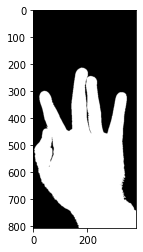

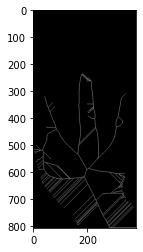

In [18]:
kernel3 = np.ones((10,10),np.float32)/25
# Invert the horse image
train_images_resized_gray_sk = []
test_images_resized_gray_sk = []

for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category) #CONVERT CATEGORY NAME TO A NUMBER
        print(f"os.listdir(path) {os.listdir(path)}")
        for img in os.listdir(path):
            img_array = cv2.imread(os.path.join(path,img))
            (b, g, r) = cv2.split(img_array)

            ret_r, thresh_r = cv2.threshold(r, 80, 255, cv2.THRESH_BINARY)
            img_array = thresh_r
            binary = cv2.morphologyEx(img_array, cv2.MORPH_OPEN, kernel3)
            
            width = int(binary.shape[1] / IMG_SIZE_FACTOR)
            height = int(binary.shape[0]  / IMG_SIZE_FACTOR)
            dim = (width, height)
            binary = cv2.resize(binary, dim, interpolation = cv2.INTER_AREA)
            
            binary = binary > filters.threshold_otsu(binary)
            plt.imshow(binary, cmap = "gray")
            plt.show()
            #print(np.unique(binary))

            #skeleton = morphology.skeletonize(binary)
            skeleton = morphology.medial_axis(binary)
            #skeleton = skeletonize(binary)
            plt.imshow(skeleton, cmap = "gray")
            plt.show()
            aux.append(skeleton)
            break
        train_images_resized_gray_sk.append(aux)
        break

In [19]:
all_sk_test = []
all_dt_sk_test = []
def import_dataset_with_sk():
    for category in CATEGORIES:
        sk = []
        dt_sk = []
        path = os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category) #CONVERT CATEGORY NAME TO A NUMBER
        print(f"os.listdir(path) {os.listdir(path)}")
        for img in os.listdir(path):
            img_array = cv2.imread(os.path.join(path,img))
            kernel = np.ones((5,5),np.float32)/25
            dst = cv2.filter2D(img_array,-1,kernel)
            (b, g, r) = cv2.split(img_array)
            r = cv2.filter2D(r,-1,kernel)
            ret_r, thresh_r = cv2.threshold(r, 90, 255, cv2.THRESH_BINARY)
            img_array = thresh_r
            kernel = np.ones((10,10),np.uint8)
            img_array = cv2.erode(img_array,kernel,iterations = 1)

            width = int(img_array.shape[1] / 5)
            height = int(img_array.shape[0]  / 5)
            dim = (width, height)
            img_array = cv2.resize(img_array, dim, interpolation = cv2.INTER_AREA)

            size = np.size(img_array)
            skel = np.zeros(img_array.shape,np.uint8)
            element = cv2.getStructuringElement(cv2.MORPH_CROSS,(3,3))
            done = False

            while( not done):
                eroded = cv2.erode(img_array,element)
                temp = cv2.dilate(eroded,element)
                temp = cv2.subtract(img_array,temp)
                skel = cv2.bitwise_or(skel,temp)
                img_array = eroded.copy()
                zeros = size - cv2.countNonZero(img_array)
                if zeros==size:
                    done = True
            dataset.append([skel, class_num])


dataset = [] 
import_dataset_with_sk()
print(len(dataset))


os.listdir(path) ['0.jpg', '1.jpg', '2.jpg', '3.jpg', '4.jpg', '5.jpg', '6.jpg', '7.jpg', '8.jpg', '9.jpg']
os.listdir(path) ['0.jpg', '1.jpg', '2.jpg', '3.jpg', '4.jpg', '5.jpg', '6.jpg', '7.jpg', '8.jpg', '9.jpg']
os.listdir(path) ['0.jpg', '1.jpg', '2.jpg', '3.jpg', '4.jpg', '5.jpg', '6.jpg', '7.jpg', '8.jpg', '9.jpg']
os.listdir(path) ['0.jpg', '1.jpg', '2.jpg', '3.jpg', '4.jpg', '5.jpg', '6.jpg', '7.jpg', '8.jpg', '9.jpg']
40


(40, 2)


E:\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


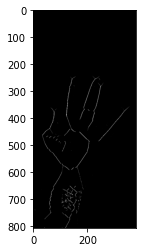

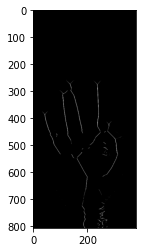

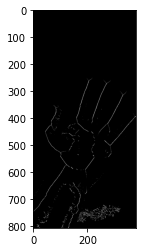

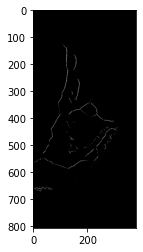

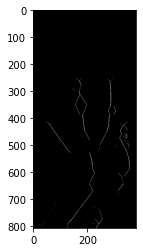

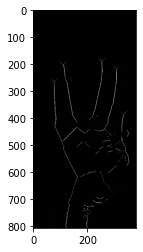

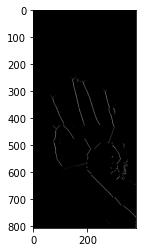

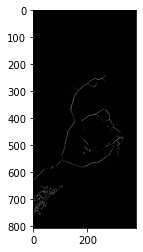

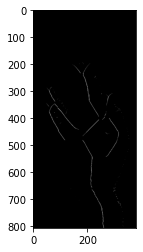

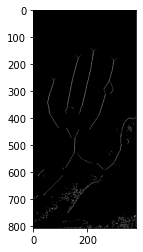

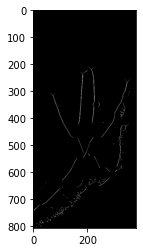

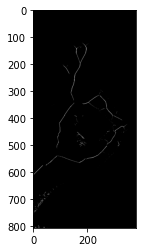

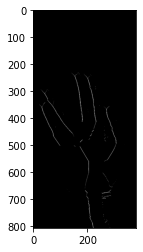

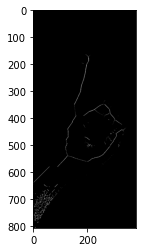

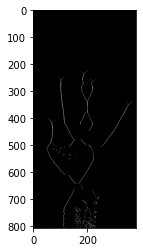

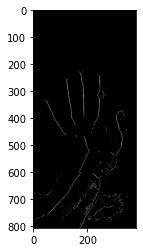

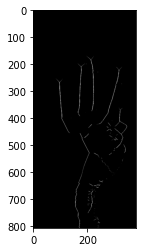

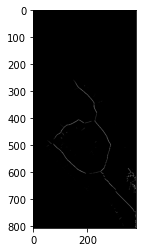

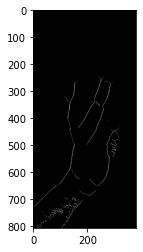

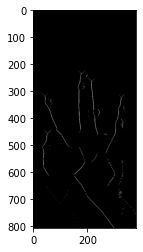

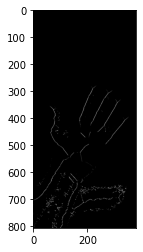

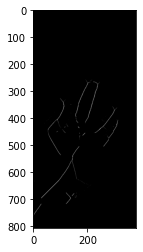

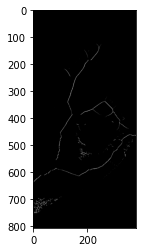

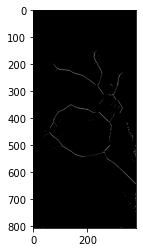

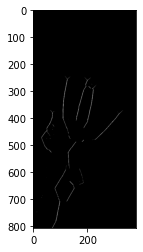

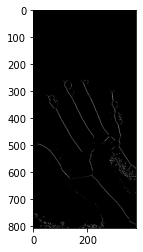

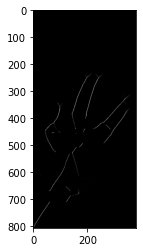

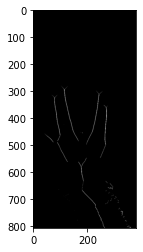

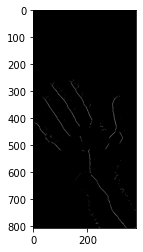

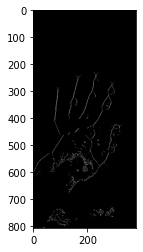

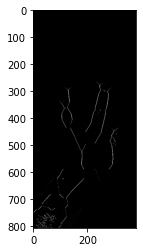

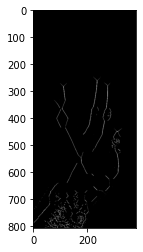

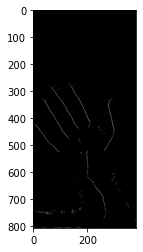

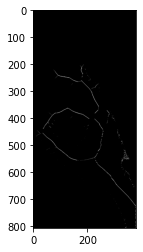

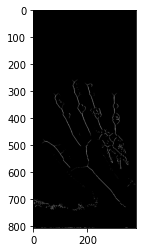

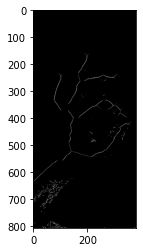

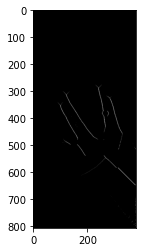

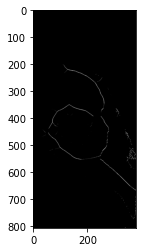

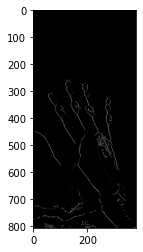

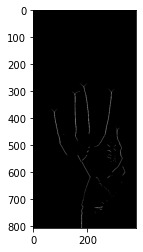

In [20]:
random.shuffle(dataset)
print(np.shape(dataset))
for img_array, eticheta in dataset:
        #print(img_array)
        #ipyplot.plot_images(img_array, max_images=27, img_width=100)
        plt.imshow(img_array, cmap = "gray")
        plt.show()

In [21]:
X = []
y = []

for features, label in dataset:
    X.append(features)
    y.append(label)
    
#X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)  #to be uncommented if chosen to resize imgs

train_ratio = 0.70
#validation_ratio = 0.30
test_ratio = 0.30

# train is now 75% of the entire data set
# the _junk suffix means that we drop that variable completely
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=1 - train_ratio)

# test is now 10% of the initial data set
# validation is now 15% of the initial data set
#x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=test_ratio/(test_ratio + validation_ratio)) 

#print(f" size of x_train: {len(x_train)}, size of x_val: {len(x_val)}, size of x_test: {len(x_test)}")
print(f" size of x_train: {len(x_train)}, size of x_test: {len(x_test)}")

 size of x_train: 27, size of x_test: 13


In [22]:
aux = []
reshaped_x_train_array = []
print(f" size of x_train: {np.shape(x_train)}")
for i in x_train:
        x,y = np.nonzero(i)
        t = np.array(list(zip(x, y))).flatten()
        print(len(t))
        aux.append(t[0:1000])
reshaped_x_train_array.append(aux)

print(f" size of reshaped_x_train_array: {np.shape(reshaped_x_train_array)}")

aux = []
reshaped_x_test_array = []
print(f" size of x_train: {np.shape(x_train)}")
for i in x_test:
        x,y = np.nonzero(i)
        t = np.array(list(zip(x, y))).flatten()
        aux.append(t[0:1000])
reshaped_x_test_array.append(aux)


 size of x_train: (27, 806, 381)
5496
6926
9702
5562
5386
13132
5410
6756
11278
6398
7938
7488
7906
6214
6054
11072
4472
13552
11678
6536
7752
13626
11320
7802
6378
7802
13654
 size of reshaped_x_train_array: (1, 27, 1000)
 size of x_train: (27, 806, 381)


In [24]:
cnt_train = 0
data_train = np.reshape(reshaped_x_train_array,(27,1000))
data_test = np.reshape(reshaped_x_test_array,(13,1000))
print(f" size of x_train: {np.shape(data_train)}")
print(f" size of x_test: {np.shape(data_test)}")

knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(data_train,y_train)

print("TRAIN DATA RESULTS")
y_train_predicted = knn.predict(data_train)

for i in range (27):
    if (y_train[i] == y_train_predicted[i]):
        print (f"y_test = {y_train[i]} && {y_train_predicted[i]} = y_predicted : TRUE")
        cnt_train += 1
    else:
        print (f"y_test = {y_train[i]} && {y_train_predicted[i]} = y_predicted : FALSE")
        
print(f"results for train data: {cnt_train} / 27")

print("\n\nTEST DATA RESULTS for knn\n")
y_test_predicted = knn.predict(data_test)
cnt_test = 0
for i in range (13):
    if (y_test[i] == y_test_predicted[i]):
        cnt_test += 1
        print (f"y_test = {y_test[i]} && {y_test_predicted[i]} = y_predicted : TRUE")
    else:
        print (f"y_test = {y_test[i]} && {y_test_predicted[i]} = y_predicted : FALSE")
print(f"results for train data: {cnt_test} / 13")

clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(data_train, y_train)
y_predicted_svm = clf.predict(data_test)

print("\n\nTEST DATA RESULTS for svm\n")
cnt_test = 0
for i in range (13):
    if (y_test[i] == y_predicted_svm[i]):
        cnt_test += 1
        print (f"y_test = {y_test[i]} && {y_predicted_svm[i]} = y_predicted : TRUE")
    else:
        print (f"y_test = {y_test[i]} && {y_predicted_svm[i]} = y_predicted : FALSE")
print(f"results for train data: {cnt_test} / 13")


 size of x_train: (27, 1000)
 size of x_test: (13, 1000)
TRAIN DATA RESULTS
y_test = 1 && 3 = y_predicted : FALSE
y_test = 0 && 0 = y_predicted : TRUE
y_test = 1 && 2 = y_predicted : FALSE
y_test = 2 && 0 = y_predicted : FALSE
y_test = 0 && 0 = y_predicted : TRUE
y_test = 3 && 2 = y_predicted : FALSE
y_test = 1 && 2 = y_predicted : FALSE
y_test = 3 && 3 = y_predicted : TRUE
y_test = 3 && 2 = y_predicted : FALSE
y_test = 2 && 2 = y_predicted : TRUE
y_test = 0 && 0 = y_predicted : TRUE
y_test = 1 && 0 = y_predicted : FALSE
y_test = 2 && 0 = y_predicted : FALSE
y_test = 1 && 3 = y_predicted : FALSE
y_test = 2 && 2 = y_predicted : TRUE
y_test = 3 && 0 = y_predicted : FALSE
y_test = 1 && 1 = y_predicted : TRUE
y_test = 3 && 2 = y_predicted : FALSE
y_test = 3 && 3 = y_predicted : TRUE
y_test = 2 && 2 = y_predicted : TRUE
y_test = 2 && 2 = y_predicted : TRUE
y_test = 3 && 0 = y_predicted : FALSE
y_test = 3 && 3 = y_predicted : TRUE
y_test = 0 && 2 = y_predicted : FALSE
y_test = 0 && 2 = y_pre